Types of Learning:
1) Supervised
2) Unsupervised
3) Reinforcement
4) Semi-supervised

Association: Finds which group of data is associated with others

Reinforcement Learning: Carrot and Stick, an agent interacts with environment and events. Positive RL rewards favourble actions and Negative RL punishes unfavourable actions.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
tvinf = pd.read_csv('data/tvmarketing.csv')

In [3]:
tvinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
# Simple 2 column data let's do single variable regression
# this is data of sales achieved(sales) vs budget for that tv show (TV)

<Axes: xlabel='TV', ylabel='Sales'>

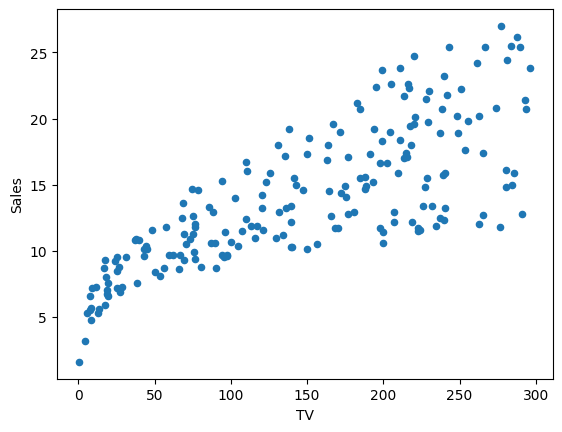

In [5]:
tvinf.plot(x='TV', y='Sales', kind='scatter')

In [6]:
# Good plot for linear regression line will come cleanly

In [7]:
# Equation for simple linear regression 
# Y = mX + c
# m = (sum(y)*sum(x^2) - sum(x)*sum(xy)) / (n*sum(x^2) - sum(x)^2)
# c = (n*sum(xy) - sum(x)*sum(y)) / (n*sum(x^2) - sum(x)^2)

In [8]:
tvinf['x'] = tvinf['TV']

In [9]:
tvinf['y'] = tvinf['Sales']

In [10]:
tvinf['xy'] = tvinf['x'] * tvinf['y']

In [11]:
tvinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
 2   x       200 non-null    float64
 3   y       200 non-null    float64
 4   xy      200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [12]:
tvinf.head()

,TV,Sales,x,y,xy
0,230.1,22.1,230.1,22.1,5085.21
1,44.5,10.4,44.5,10.4,462.80
2,17.2,9.3,17.2,9.3,159.96
3,151.5,18.5,151.5,18.5,2802.75
4,180.8,12.9,180.8,12.9,2332.32


In [13]:
tvinf['x2'] = tvinf['x'] * tvinf['x']

In [14]:
tvinf['y2'] = tvinf['y'] * tvinf['y']

In [15]:
tvinf.head()

,TV,Sales,x,y,xy,x2,y2
0,230.1,22.1,230.1,22.1,5085.21,52946.01,488.41
1,44.5,10.4,44.5,10.4,462.80,1980.25,108.16
2,17.2,9.3,17.2,9.3,159.96,295.84,86.49
3,151.5,18.5,151.5,18.5,2802.75,22952.25,342.25
4,180.8,12.9,180.8,12.9,2332.32,32688.64,166.41


In [16]:
tvinf['x'].sum()


29408.5

In [17]:
c = (tvinf['y'].sum()*tvinf['x2'].sum() - tvinf['x'].sum() *tvinf['xy'].sum()) / (len(tvinf)*tvinf['x2'].sum() - tvinf['x'].sum()**2)
m = (len(tvinf)*tvinf['xy'].sum() - tvinf['x'].sum()*tvinf['y'].sum()) /  (len(tvinf)*tvinf['x2'].sum() - tvinf['x'].sum()**2)




In [18]:
m

0.04753664043301974

In [19]:
c

7.032593549127694

In [20]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax = plt.plot(x_vals, y_vals, 'r--', )
    return ax


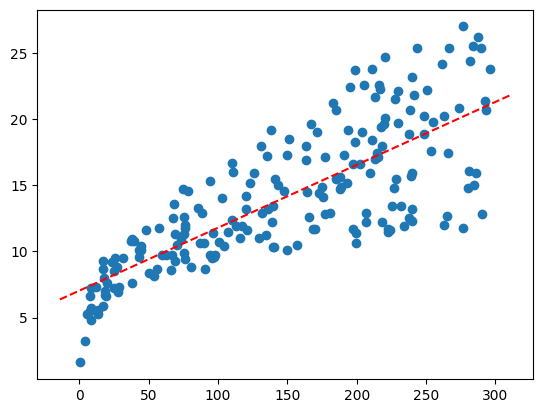

In [21]:
plt.scatter(tvinf["x"], tvinf["y"])
ax = abline(m, c)

In [22]:
# Looks decent

In [23]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""

    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)

        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""

    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

In [24]:
ls 

GradientDescent.ipynb           RegrMetrics.ipynb
IntroAndSimpleLinearRegr.ipynb  Untitled.ipynb
MultiRegrLib.ipynb              data/
MultipleLineRegr.ipynb


In [25]:
import RegrMetrics

importing Jupyter notebook from RegrMetrics.ipynb


In [26]:
ypr = m * tvinf['x'] + c

In [27]:
RegrMetrics.mae(ypr, tvinf['y'])

2.5498060389274864

In [28]:
RegrMetrics.mse(ypr, tvinf['y'])

10.512652915656759

In [29]:
RegrMetrics.rmse(ypr, tvinf['y'])

3.2423221486546887

In [30]:
RegrMetrics.rmsle(ypr, tvinf['y'])

1.1762897856361971

In [31]:
RegrMetrics.rsqr(ypr, tvinf['y'], tvinf['y'].mean())

0.611875050850071